In [1]:
# naimportovanie knižnice pandas ako akronym pd   
# pandas -> používa sa hlavne na analýzu dát, umožňuje importovať dáta z rôznych formátov ako napr. csv, excel, JSON, SQL, ...
import pandas as pd

# naimportovanie knižnice numby ako akronym np    
# numpy ->  používa sa pre prácu poľami, maticami, ...
import numpy as np

# naimportovanie knižnice matplotlib.pyplot ako akronym plt
# matplotlib.pyplot -> používa sa na vizualizáciu dát
import matplotlib.pyplot as plt

# naimportovanie knižnice seaborn ako akronym sns
# seaborn -> používa sa na vizualizáciu dát
import seaborn as sns

# naimportovanie python knižnice keras pre tvorbu neuŕonových sietí
import keras

#naimportovanie funkcie StandardScaler, ktorá štandardizuje odpočítaním priemeru a následným zmenšením na rozptyl jednotiek. 
from sklearn.preprocessing import StandardScaler

# naimportovanie Sekvenčného modelu z knižnice keras
from keras.models import Sequential

# Vrstva, kde každý neurón vo vrstve prijíma vstup zo všetkých neurónov prítomných v predchádzajúcej vrstve
from keras.layers import Dense 

# model pre rozdelenie dát na podmnožiny testovacích a trénovacích dát
from sklearn.model_selection import train_test_split

# model na vizualizáciu neurónovej siete
from keras.utils.vis_utils import plot_model 

In [2]:
# uloženie datasetu do premennej dataset, s príznakom sep=";" (dáta sú oddelené znakom ;)

dataset = pd.read_csv('cardiovascular_diseases_dv3.csv',sep=";")

In [3]:
# zobrazenie datasetu aby sme sa ujistili či je všetko v poriadku

dataset

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [4]:
# Predtým než začneme prácu s datasetom, ujistíme sa či stĺpce nemajú prázne hodnoty, aby sme sa vyhli nesprávnym výsledkom.

dataset.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [5]:
# funkcia pre stručné informatívne zhrnutie datasetu

dataset.info()

# dataset obsahuje 12 stĺpcov so 68783 záznamami, čo sa týka významu stĺpcov:
#(integer)      AGE (vek)                                 --> vek pacienta (integer)
#(kategorická)  GENDER (pohlavie)                         --> pohlavie pacienta: 1 - žena, 2 - muž    
#(integer)      HEIGHT (výška)                            --> výška pacienta v centimetroch
#(integer)      WEIGHT (váha)                             --> váha pacienta v kilogramoch              
#(integer)      AP_HIGH (horný krvný tlak)                --> horný krvný tlak (meraný pri sťahovaní srdca)   # 120 #
#(integer)      AP_LOW (dolný krvný tlak)                 --> dolný krvný tlak (meraný pri ovoľnení srdca)    #  80 #
#(kategorická)  CHOLESTEROL (cholesterol v krvi)          --> hladina cholesterolu v krvi: 1 - v norme, 2 - hraničná, 3 - vysoká
#(kategorická)  GLUCOSE (cukor v krvi)                    --> hladina cukru v krvi: 1 - v norme, 2 - hraničná, 3 vysoká
#(kategorická)  SMOKE (fajčiar)                           --> či je pacient fajčiar: 0 - nefajčiar, 1 - fajčiar 
#(kategorická)  ALCOHOL (užívanie alkoholu)               --> či pacient užíva alkohol: 0 - nie, 1 - áno
#(kategorická)  PHYSICAL_ACTIVITY (fyzická aktivita)      --> či pacient je fyzicky aktívny: 0 - nie, 1 - áno
#(kategorická)  CARDIO_DISEASE (kardiovaskulárna choroba) --> či pacient trpel kardiovaskulárnou chorobou: 0 - nie, 1 - áno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [6]:
# Funkcia, ktorá počíta súhrn štatistík týkajúcich sa stĺpcov DataFramu. Ponúka informácie:
# count --> počet záznamov
# mean  --> priemernú hodnotu
# std   --> smerodajná odchýlka
# min   --> minimálna hodnota
# max   --> maximálna hodnota
# 25%   --> Q1 - dolný kvartil, oddeľuje najnižších 25% údajov od najvyšších 75%
# 50%   --> Q2 - druhý kvartil, rozdeluje dáta na polovicu
# 75%   --> Q3 - horný kvartil, oddeľuje najvyšších 25% údajov od najnižších 75% 

dataset.describe()

# Ako môžme vidieť, v datasete nájdeme záznamy prevažne ženách, vek pacientov sa pohyboval medzi 30 (min) a 65 (max) rokmi,
# išlo väčšinou o štíhlych pacientov skoro s ukážkovým krvným tlakom, hladinu cholesterolu a cukru v krvi malo v priemere 
# v norme, v drvivej väčšine išlo o nefajčiarov, ktorý nepili alkohol a venovali sa fyzickej aktivite.

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([<AxesSubplot:ylabel='CARDIO_DISEASE'>], dtype=object)

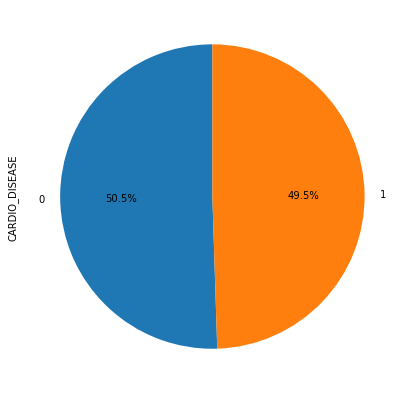

In [7]:
# Vizualizujeme si počet pacientov, ktorý trpeli kardiovaskulátnou chorobou

dataset.CARDIO_DISEASE.value_counts().plot(kind='pie', subplots=True, startangle=90, figsize=(10,7), autopct='%1.1f%%')

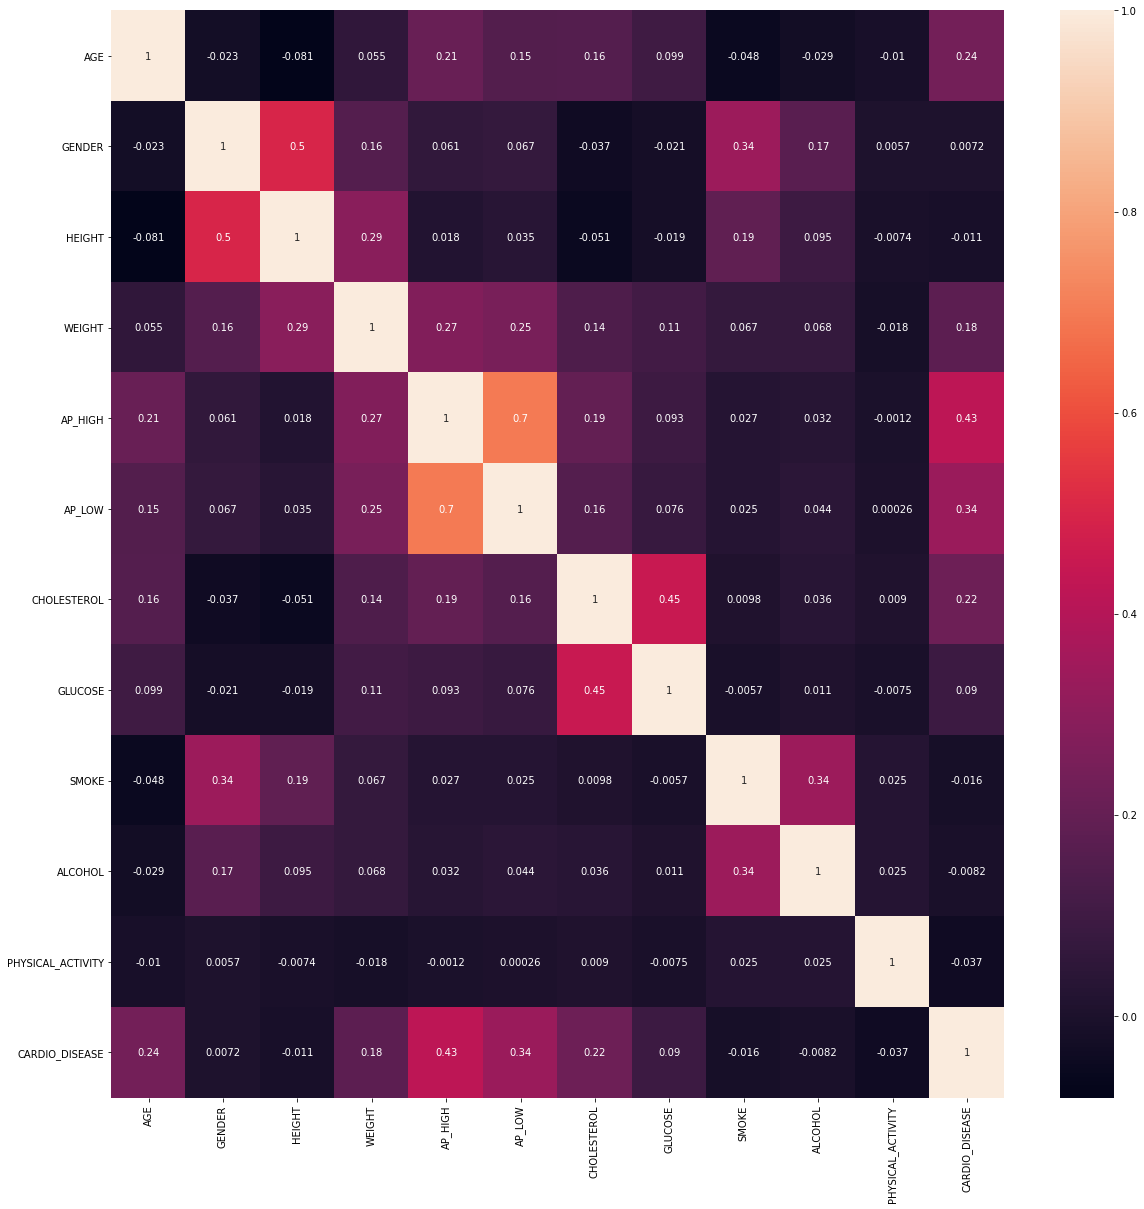

In [8]:
# fukncia corr() sa používa na nájdenie párovej korelácie všetkých stĺpcov v dataframe. Korelačná matica je dôležitá metrika 
# analýzy údajov, aby sa pochopil vzťah medzi rôznymi premennými. 
# Každý riadok a stĺpec predstavuje premennú a každá hodnota v tejto matici je korelačným koeficientom medzi premennými 
# predstavovanými príslušným riadkom a stĺpcom.
# ak je hodnota blízko +1 --> silný pozitívny vzťah medzi riadkom a stĺpcom (obe hodnoty sa menia rovnakým smerom)
# ak je hodnota blízko -1 --> silný negatívny vzťah medzi riadkom a stĺpcom (jedná hodnota stĺpa, druhá klesá)
# ak je hodnota blízko 0  --> znamená, že medzi riadkom a stĺpcom neni žiadny vzťah

corrMatrix = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Z grafu môžme vidieť, že stĺpec "CARDIO_DISEASE" najviac lineárne koreluje so stĺpcami "AGE", "WEIGHT", "AP_HIGH", "AP_LOW" 
# a "CHOLESTEROL", ktoré si môžme zvizualizovať

S kardiovaskulárnou chorobou ('CARDIO_DISEASE' == 1):


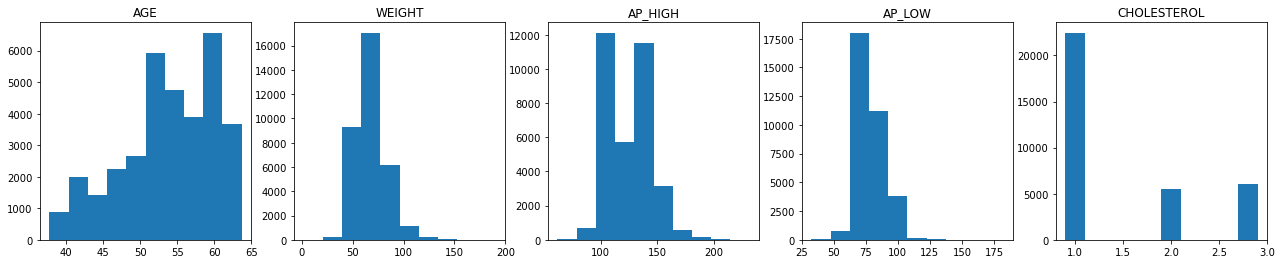

_______________________________________________________________________________________________________________________________

Bez kardiovaskulárnej choroby ('CARDIO_DISEASE' == 0):


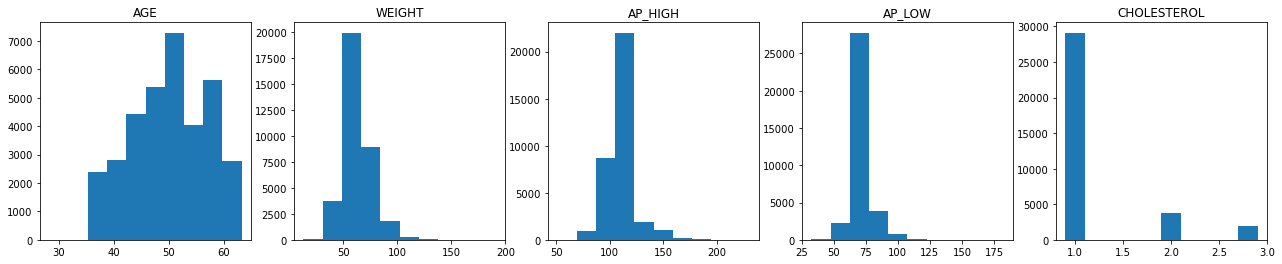

In [9]:
# Vizualizujeme stĺpce, ktoré mali najväčšiu lineránu koreláciu so stĺpcom "CARDIO_DISEASE", 
# konkrétne stĺpce AGE, WEIGHT, AP_HIGH, AP_LOW a CHOLESTEROL, z ktorých vytvoríme histogramy pre "CARDIO_DISEASE" == 0 a 1

print("S kardiovaskulárnou chorobou ('CARDIO_DISEASE' == 1):")
df = pd.DataFrame(dataset, columns= np.array(dataset.columns))
cardio = df.loc[(df.CARDIO_DISEASE == 1)]
fig, ax = plt.subplots(1,5,figsize=(22, 4))
i = 0
j = 0

columns = cardio.iloc[:,[0,3,4,5,6]]
for c in columns:
    ax[i].hist(cardio[c], align='left')
    ax[i].set_title(c)
    i = i + 1

        
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

print("_______________________________________________________________________________________________________________________________")
print()
print("Bez kardiovaskulárnej choroby ('CARDIO_DISEASE' == 0):")
df = pd.DataFrame(dataset, columns= np.array(dataset.columns))
cardio = df.loc[(df.CARDIO_DISEASE == 0)]
fig, ax = plt.subplots(1,5,figsize=(22, 4))
i = 0
j = 0

columns = cardio.iloc[:,[0,3,4,5,6]]
for c in columns:
    ax[i].hist(cardio[c], align='left')
    ax[i].set_title(c)
    i = i + 1

        
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

# z grafov môžme pozorovať, že pacienti, ktorý mali vyšší vek, váhu, vyšší krvný tlak a vyššiu hladinu choresterolu trpeli
# nejakou formou kardiovaskulárnej choroby

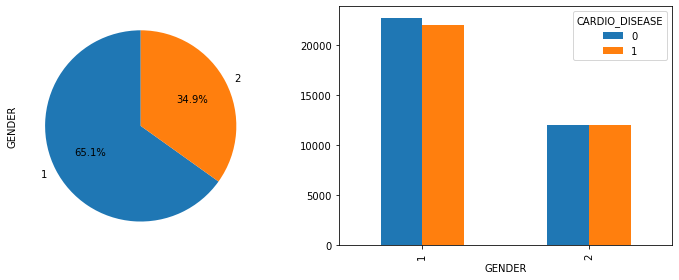

In [10]:
# Čo sa týka stĺpcov, ktorých linerána korelácia sa blížila 0, si môžme pre ukážku vizualizovať stĺpec "GENDER"
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

dataset.GENDER.value_counts().plot(kind='pie', subplots=True,startangle=90, figsize=(12,7), autopct='%1.1f%%',ax=ax1)
pd.crosstab(dataset.GENDER, dataset.CARDIO_DISEASE).plot(kind = 'bar',ax=ax2)

plt.tight_layout()

# V dataset tvorili záznami prevažne o ženách (1), až 65,1%, muži(2) tvorili 34,9% vzorky.
# Druhý graf zobrazuje počet mužov a žien, ktorý trpeli nejakou formou kardiovaskulárnej choroby, z grafu môžme pozorovať, že
# počet žien/mužov, ktorý mali/nemali kardiovaskulárnu chorobu je približne rovnaký.

# Rovnaké výsledky by sme videli aj pri grafoch stĺpcov HEIGHT, GLUCOSE, SMOKE, ALCOHOL a PHYSICAL ACTIVITY
# Uvedené stĺpce nie su pre nás podstatné kvôli ich lineárnej korelácií blížiacej sa 0

In [11]:
# vytvoríme premennú y do ktorej si alokujeme hodnoty datasetu zo stĺca s indexom 11 "CARDIO_DISEASE"
# teda hodnoty či pacient mal/nemal kardiovaskulárnu chorobu

y = dataset.iloc[:,11].values

In [12]:
# vytvoríme premennú x do ktorej si alokujeme hodnoty datasetu zo stĺpcov s indexom 0,3,4,5,6 (AGE, WEIGHT, AP_HIGH, 
# AP_LOW, CHOLESTEROL)

x = dataset.iloc[:,[0,3,4,5,6]].values

In [13]:
# použijeme funkciu train_test_split, do ktorej si ako parametre vložíme:
# x, y         --> množiny dát, ktoré sa si ilokovali
# test_size    --> veľkosť testovacích dát (v našom prípade 0.2 čo reprezentuje 20%)
# random_state --> seed do náhodného generátora, aby train-test boli vždy deterministické

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [14]:
# výpis veľkosti X_train, teda trénovacích dát pre lepšie určenie veľkosti "batch_size" pri trénovaní modelu

len(X_train)

55026

In [15]:
# StandardScaler štandardizuje funkciu odpočítaním priemeru a následným zmenšením na rozptyl jednotiek. 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # normalizacia hodnôt v premennej X_train
X_test = scaler.fit_transform(X_test) # normalizacia hodnôt v premennej X_test

In [16]:
# vytvorenie modelu Sequential()
# sekvenčný model je lineárny stoh vrstiev, každá vrstva má jeden vstupný a výstupný tenzor
model = Sequential()

# pridanie vstupnej vrstvy do modelu
# Dense --> hlboko spojená vrstva neurónovej siete. Je to najbežnejšia a často používaná vrstva. Hustá vrstva vykoná 
# na vstupe nasledujúcu operáciu a vráti výstup
# prvý parameter označuje počet neurónov použitých v danej vrstve
# input_dim --> dimenzia vstupu, počet vstupných tried
# relu --> aktivačná funkcia, ktorá vráti 0, ak prijme akýkoľvek negatívny vstup, ale pre každú kladnú hodnotu x 
# vráti túto hodnotu späť. Matematicky ju môžme zapísať ako y = max (0, x) 
model.add(Dense(16, activation='relu', input_dim=5))

# pridanie skrytej vrstvy do modelu s počtom neurónov 32 a aktivačnou funkciou "relu"
model.add(Dense(8, activation='relu'))

# pridanie výstupnej vrstvy
# sigmoid --> aktivačná funkcia výstupnej vrstvy, Hlavným dôvodom, prečo používame sigmoidnú funkciu, je skutočnosť, že 
# existuje medzi (0 až 1). Preto sa používa hlavne pre modely, kde musíme predpovedať pravdepodobnosť ako výstup. 
# Pretože pravdepodobnosť niečoho existuje iba v rozmedzí od 0 do 1. Na výstupe vždy vráti 0 alebo 1, ak hodnota je v intervale
# <0,0.5) vráti 0, ak je hodnota v intervale <0.5,1> vráti 1
model.add(Dense(1, activation='sigmoid'))

# nadstavenie rýchlosti učenia optimizeru "adam" na hodnotu 0.001
# Rýchlosť učenia riadi, ako rýchlo je model adaptovaný na problém. Menšia rýchlosť učenia vyžaduje viac výcvikových epoch 
# vzhľadom na menšie zmeny v váhach každej aktualizácie, zatiaľ čo vyššia rýchlosť učenia vedie k rýchlym zmenám a vyžaduje 
# menej výcvikových epoch. 
optimizer = keras.optimizers.Adam(lr=0.001)

# funkcia compile nadstavuje proces učenia modelu, ako parametre volíme loss funkciu, optimizer a metriku
# binary_crossentropy -- > porovnáva každú z predpovedaných pravdepodobností s výstupom skutočnej triedy, ktorý môže byť 
# buď 0 alebo 1. Vypočíta skóre, ktoré penalizuje pravdepodovnosti založené na vzdialenosti od očakávanej hodnoty.
# To znamená, ako blízko alebo ďaleko od skutočnej hodnoty.

# adam --> je metóda stochastického gradientového zostupu, ktorá je založená na adaptívnom odhade momentov prvého
# a druhého rádu. Algoritmus je výpočtovo efektívny, vyžaduje málo pamäte, je invariantný k diagonálnemu prepočítavaniu
# prechodov a je vhodný na veľké problémy čo sa týka dát a parametrov

#accuracy --> Metrika = presnoť, ktorá sa používa na hodnotenie výkonu modelu. Podľa tejto vieme s akou presnosťou
#                       náš model predikoval

model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

# trénovanie modelu, kde vkladáme naše trénovacie dáta (X_train, y_train), 
# validation_data --> údaje, na základe ktorých je možné vyhodnotiť stratu, a všetky modelové metriky na konci každej epochy
#                     na základe týchto údajov nebude model trénovaný.
# epochs          --> počet iterácií
# batch_size      --> počet vzoriek na aktualizáciu gradientu
# verbose         --> 0 - 3, podľa toho aký detailný výpis iterácie chceme.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=2038)

Epoch 1/200
27/27 [==============================] - 1s 29ms/step - loss: 0.6996 - accuracy: 0.5328 - val_loss: 0.6587 - val_accuracy: 0.6437
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6511 - val_loss: 0.6250 - val_accuracy: 0.6773
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6849 - val_loss: 0.6022 - val_accuracy: 0.6943
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6982 - val_loss: 0.5850 - val_accuracy: 0.7050
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7108 - val_loss: 0.5737 - val_accuracy: 0.7137
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7160 - val_loss: 0.5669 - val_accuracy: 0.7179
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7192 - val_loss: 0.5620 - val_accuracy: 0.7211
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7313 - val_loss: 0.5480 - val_accuracy: 0.7301
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7283 - val_loss: 0.5479 - val_accuracy: 0.7302
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7306 - val_loss: 0.5480 - val_accuracy: 0.7300
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7334 - val_loss: 0.5479 - val_accuracy: 0.7302
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7309 - val_loss: 0.5480 - val_accuracy: 0.7303
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7339 - val_loss: 0.5478 - val_accuracy: 0.7302
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.7342 - val_loss: 0.5479 - val_accuracy: 0.7305
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7343 - val_loss: 0.5476 - val_accuracy: 0.7299
Epoch 117/200
27/27 [==============================] - ETA: 0s - loss: 0.5397 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7350 - val_loss: 0.5473 - val_accuracy: 0.7298
Epoch 118/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7306 - val_loss: 0.5474 - val_accuracy: 0.7302
Epoch 119/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7322 - val_loss: 0.5477 - val_accuracy: 0.7289
Epoch 120/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7285 - val_loss: 0.5475 - val_accuracy: 0.7292
Epoch 121/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7342 - val_loss: 0.5473 - val_accuracy: 0.7306
Epoch 122/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7316 - val_loss: 0

27/27 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7329 - val_loss: 0.5476 - val_accuracy: 0.7300
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7339 - val_loss: 0.5475 - val_accuracy: 0.7297
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7316 - val_loss: 0.5473 - val_accuracy: 0.7289
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7335 - val_loss: 0.5476 - val_accuracy: 0.7294
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7316 - val_loss: 0.5475 - val_accuracy: 0.7297
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7308 - val_loss: 0.5475 - val_accuracy: 0.7294
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7335 - val_loss: 0.5475 - val_accuracy: 0.7294
Epoch 180/200

In [17]:
# z natrénovaného modelu pomocou funkcie predict() zistíme úspešnosť našeho modelu na testovacích dátach

y_pred = model.predict(X_test)

# do premennej score si pomocou funkcie evaluate(), uložíme hodnoty loss (straty) a accuracy (presnosti)

score = model.evaluate(X_test, y_test,verbose=0)

# vo výpise môžeme vidieť úspešnosť našeho modelu v percentách

print('validation loss:', str(round(score[0]*100,2))+"%")
print('validation accuracy:', str(round(score[1]*100,2))+"%")

validation loss: 54.74%
validation accuracy: 72.97%


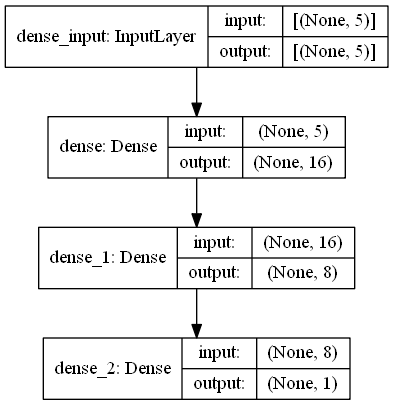

In [18]:
# pomocou funkcie plot_model si môžme vizualizovať našu neurónovú sieť a uložiť ako súbor *.png

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [19]:
# z premennej history, do ktorej sme uložili trénovanie modelu, zistíme keys, ktoré následne vizualizujeme

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


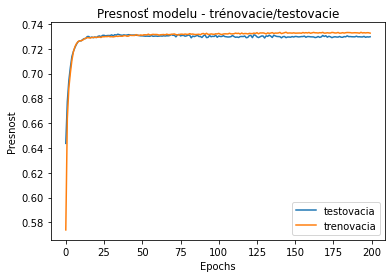

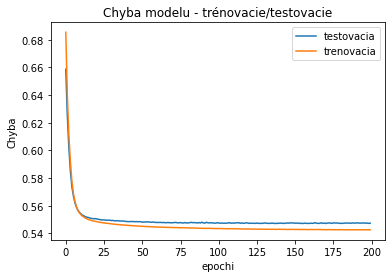

In [20]:
# vizualizácia chyby a presnosti na trénovacích a testovacích dátach

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Presnosť modelu - trénovacie/testovacie')
plt.ylabel('Presnost')
plt.xlabel('Epochs')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Chyba modelu - trénovacie/testovacie')
plt.ylabel('Chyba')
plt.xlabel('epochi')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [21]:
# vytvorenie funkcie pre testovanie vlastného vstupu na natrénovanej neurónovej sieti, do ktorej používateľ môže zadať:
# vek, váhu, krvný tlak (horný a dolný), a hladinu cholesterolu v krvi
# funkcia mu na základe vstupných parametrov vráti, či má/nemá nábeh na kardiovaskulárnu chorobu s určitou pravdepodobnosťou


def predikcia(AGE, WEIGHT, AP_HIGH, AP_LOW, CHOLESTEROL):
    predict = pd.DataFrame({'AGE':int(AGE), 
                            'WEIGHT':int(WEIGHT),
                            'AP_HIGH':int(AP_HIGH), 
                            'AP_LOW':int(AP_LOW),
                            'CHOLESTEROL':int(CHOLESTEROL)}, index=[0]) 
                            
    X = scaler.transform(predict)
    prediction = model.predict_classes(X)
    score_percents = str(round(score[1]*100,2))+"%"
    if(prediction[0]==0):
        return "Pacient nemá nábeh na kardiovaskulárnu chorobu s " + score_percents + " pravdepodovnosťou."
    else:
        return "Pacient má so " + score_percents + " pravdepodovnosťou nábeh na kardiovaskulárnu chorobu"

In [22]:
# testovanie modelu pre vstupné dáta používateľa

AGE = input("Vek: ")
WEIGHT = input("Váha: ")
AP_HIGH = input("AP_HIGH: ")
AP_LOW = input("AP_LOW: ")
CHOLESTEROL = input("CHOLESTEROL: ")
predikcia(AGE, WEIGHT, AP_HIGH, AP_LOW,CHOLESTEROL)

Vek: 30
Váha: 75
AP_HIGH: 120
AP_LOW: 70
CHOLESTEROL: 1


D:\Software\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Pacient nemá nábeh na kardiovaskulárnu chorobu s 72.97% pravdepodovnosťou.'